In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths
features_path = r"C:\Users\LENOVO\Downloads\archive (4)\features.csv"
stores_path = r"C:\Users\LENOVO\Downloads\archive (4)\stores.csv"
train_path = r"C:\Users\LENOVO\Downloads\archive (4)\train.csv"
test_path = r"C:\Users\LENOVO\Downloads\archive (4)\test.csv"

# Load CSV files
features = pd.read_csv(features_path)
stores = pd.read_csv(stores_path)
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Show the first 5 rows of train dataset
print("Train Data Sample:")
print(train.head())


Train Data Sample:
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [2]:
# Merge train data with features and stores to get full info
train_merged = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')
train_merged = pd.merge(train_merged, stores, on='Store', how='left')

print("Merged Train Data Sample:")
print(train_merged.head())


Merged Train Data Sample:
   Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1  2010-02-05      24924.50      False        42.31       2.572   
1      1     1  2010-02-12      46039.49       True        38.51       2.548   
2      1     1  2010-02-19      41595.55      False        39.93       2.514   
3      1     1  2010-02-26      19403.54      False        46.63       2.561   
4      1     1  2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment Type    Size  
0         8.106    A  151315 

In [3]:
train_merged['Date'] = pd.to_datetime(train_merged['Date'])
train_merged['Year'] = train_merged['Date'].dt.year
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Day'] = train_merged['Date'].dt.day
train_merged['WeekOfYear'] = train_merged['Date'].dt.isocalendar().week

print("Date Features Added:")
print(train_merged[['Date', 'Year', 'Month', 'Day', 'WeekOfYear']].head())


Date Features Added:
        Date  Year  Month  Day  WeekOfYear
0 2010-02-05  2010      2    5           5
1 2010-02-12  2010      2   12           6
2 2010-02-19  2010      2   19           7
3 2010-02-26  2010      2   26           8
4 2010-03-05  2010      3    5           9


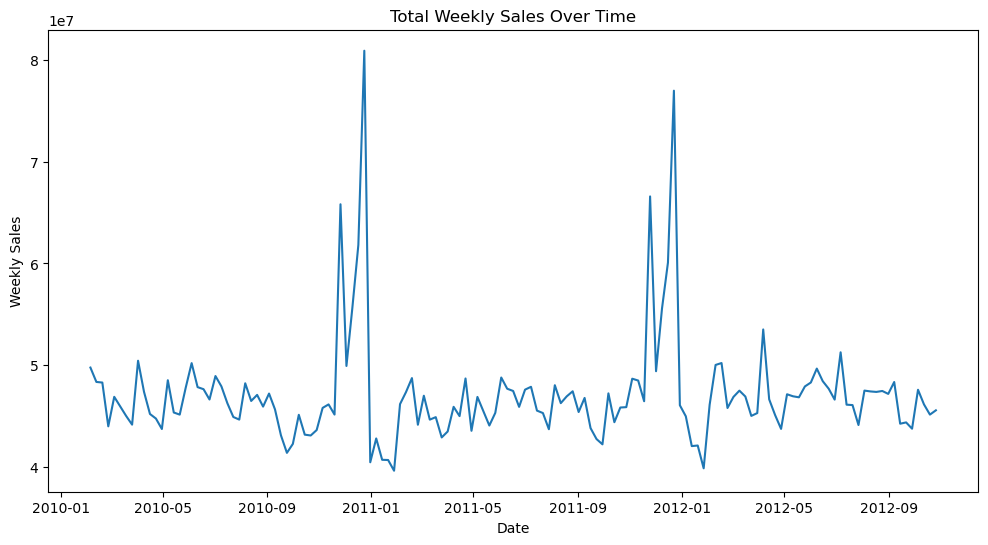

In [4]:
plt.figure(figsize=(12,6))
plt.plot(train_merged.groupby('Date')['Weekly_Sales'].sum())
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()


In [5]:
# Select features
feature_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'WeekOfYear', 'Size', 'Type']

# Convert categorical columns to numeric (IsHoliday, Type)
train_merged['IsHoliday'] = train_merged['IsHoliday'].astype(int)
train_merged['Type'] = train_merged['Type'].astype('category').cat.codes

X = train_merged[feature_cols]
y = train_merged['Weekly_Sales']


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}")
print(f"Validation samples: {len(X_val)}")


Training samples: 337256
Validation samples: 84314


In [7]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model training completed.")


Model training completed.


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Validation RMSE: {rmse:.2f}")
print(f"Validation R^2: {r2:.2f}")


Validation RMSE: 3337.43
Validation R^2: 0.98


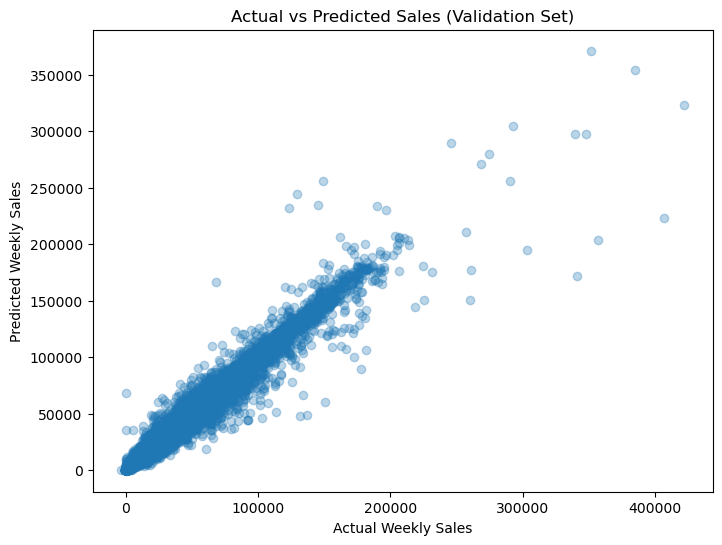

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Actual vs Predicted Sales (Validation Set)")
plt.show()


In [10]:
# Merge test with features and stores
test_merged = pd.merge(test, features, on=['Store', 'Date', 'IsHoliday'], how='left')
test_merged = pd.merge(test_merged, stores, on='Store', how='left')

# Convert date and extract features
test_merged['Date'] = pd.to_datetime(test_merged['Date'])
test_merged['Year'] = test_merged['Date'].dt.year
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Day'] = test_merged['Date'].dt.day
test_merged['WeekOfYear'] = test_merged['Date'].dt.isocalendar().week

# Encode categorical variables
test_merged['IsHoliday'] = test_merged['IsHoliday'].astype(int)
test_merged['Type'] = test_merged['Type'].astype('category').cat.codes

X_test = test_merged[feature_cols]

# Predict sales for test data
test_preds = model.predict(X_test)

# Add predictions to test dataframe
test_merged['Predicted_Weekly_Sales'] = test_preds

print(test_merged[['Store', 'Dept', 'Date', 'Predicted_Weekly_Sales']].head())


   Store  Dept       Date  Predicted_Weekly_Sales
0      1     1 2012-11-02              30189.9648
1      1     1 2012-11-09              20162.3007
2      1     1 2012-11-16              19305.1537
3      1     1 2012-11-23              18734.8933
4      1     1 2012-11-30              31629.1063
